In [1]:
"""
Start with long string,
hash it to get long number.
use mode to get records from projected files
"""

'\nStart with long string,\nhash it to get long number.\nuse mode to get records from projected files\n'

In [2]:
import pandas as pd
from glob import glob
import hashlib

In [3]:
def get_user_code(s):
    return int(hashlib.sha256(s.encode('utf-8')).hexdigest(), 16) % 10**7

In [32]:
def get_row_num(meta_df, user_code, ind):
   # print("user_code = {}, ind = {}".format(user_code, ind))
    num_recs = meta_df.iloc[ind]["num_recs"]
    #print("num_recs = {}".format(num_recs))
    return (user_code%num_recs)

In [5]:
def get_row(meta_df, file_id, row_num):
    df = pd.read_csv(meta_df.iloc[file_id]["filename"], nrows=row_num+1)
    return df.iloc[len(df)-1]

In [6]:
def get_meta_df():
    meta_path = "../data/inputs/meta_projected.csv"
    meta_df = pd.read_csv(meta_path)
    return meta_df

In [70]:
import re
def remove_tags(s):
    if not isinstance(s, str):
        return s
    p = re.compile('(<.*?>)')
    return p.sub('',s)

In [71]:
def get_record_list(user_code, meta_df):
    res = []
    for _idx, row in meta_df.iterrows():
        row_num = get_row_num(meta_df, user_code, _idx)
        d_row = get_row(meta_df, _idx, row_num)
        for k,v in d_row.items():
           res.append({"desc":row["resource"],
                    "var":k,
                    "val":remove_tags(v)})
    return res

In [72]:
def display_resource(df):
    print(df.ix[0])
    columns = set(df.columns).difference(set(["desc"]))
    print(df[columns])

In [73]:
user_code = get_user_code("here is a nicer string")
print(user_code)
meta_df = get_meta_df()
res = get_record_list(user_code, meta_df)
res_df = pd.DataFrame(res)
res_df.to_csv("../data/outputs/user_data.csv", index=False)

9947643


In [74]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image, ImageOps
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from matplotlib.pyplot import imshow
%matplotlib inline
import matplotlib.pyplot as plt
from tqdm import tqdm

In [78]:
all_text = ' '.join([str(f) for f in res_df.val.tolist()])
print(all_text)

קציר-חריש מרכז קבלנים 1  על קיר הסניף בנק מזרחי טפחות בע"מ סוג אטרקציה: מוזיאונים ותרבות, אזור: תל אביב והמרכז, כתובת: סמטת הבאר 2, מזכרת בתיה, שעות פתיחה: ללא הגבלה כן ציוני דרך- מרכז סיור ולימוד nan nan nan The kibbutz was established in 1982 by Jesaiah Ben-Aharon and other followers of Rudolf Steiner, and was named after the oleander plants growing in the area. Kibbutz members live according to the anthroposophy philosophy.[2] Harduf has several health centers: Beit Elisha, for rehabilitation of adults with special needs; the Tuvia community, for children and youth who have been removed from their homes and need a new foster family; and the Hiram, which seeks to help youths who suffer from emotional problems.[3]
In 2007, Harduf cut off its local sewage from the national system, in order to cleanse the waste matter so it can be used for watering stalks and trees. The members plan to set up an ecological park on recycled water Harduf 0.02 0.01 0.04 חורפיש בריטניה פוקס טרייר 4 טריירים 

In [86]:
def is_english(w):
    if ord(w.lstrip()[0]) < 128:
        return True
    else:
        return False

In [87]:
def invert_hebrew(w):
    if is_english(w):
        return w
    else:
        return w[::-1]

In [88]:
def black_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%, 0%)"

In [89]:
def calc_save_word_cloud(text, out_path="../data/outputs/wordcloud_morning.jpg", mask=None):
    word_list = [invert_hebrew(w) for w in text]
    text = ' '.join(word_list)
    wordcloud = WordCloud(max_words=1000, 
                          background_color="white", 
                          font_path="C:/Windows/Fonts/arial.ttf", 
                          mask=mask).generate(text)
    wordcloud.recolor(color_func = black_color_func)
    print("wordcloud type = ")
    print(type(wordcloud))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    xPix = mask.shape[0]
    yPix = mask.shape[1]

    xSize = 32 #inches
    ySize = xSize/xPix*yPix
    plt.gcf().set_size_inches(xSize,ySize)
    #plt.show()
    plt.savefig(out_path)

In [90]:
def get_image(image_path):
    res_im  = Image.open(image_path)
    #res_im  = res_im.rotate(-90)
    #imshow(np.asarray(res_im))
    return res_im

In [98]:
def get_cloud_mask(mask_path, dataset_path,out_path):
    mask_im = get_image(mask_path)
#     print("got image")
#     orig_im = orig_im.crop((500,0, 3500,3024))
#     #imshow(orig_im)
#     print("cropped")
#     print(orig_im.size)
#     mask_im = get_mask(orig_im)
    print("got mask")
    #mask_im = mask_im.rotate(180)
    imshow(mask_im)
    print("in get_cloud_mask, text={}".format(all_text))
    calc_save_word_cloud(text=all_text.split(),
                         mask=np.asarray(mask_im),
                        out_path=out_path)
    print("saved cloud")
    #imshow(mask_im)

got mask
in get_cloud_mask, text=קציר-חריש מרכז קבלנים 1  על קיר הסניף בנק מזרחי טפחות בע"מ סוג אטרקציה: מוזיאונים ותרבות, אזור: תל אביב והמרכז, כתובת: סמטת הבאר 2, מזכרת בתיה, שעות פתיחה: ללא הגבלה כן ציוני דרך- מרכז סיור ולימוד nan nan nan The kibbutz was established in 1982 by Jesaiah Ben-Aharon and other followers of Rudolf Steiner, and was named after the oleander plants growing in the area. Kibbutz members live according to the anthroposophy philosophy.[2] Harduf has several health centers: Beit Elisha, for rehabilitation of adults with special needs; the Tuvia community, for children and youth who have been removed from their homes and need a new foster family; and the Hiram, which seeks to help youths who suffer from emotional problems.[3]
In 2007, Harduf cut off its local sewage from the national system, in order to cleanse the waste matter so it can be used for watering stalks and trees. The members plan to set up an ecological park on recycled water Harduf 0.02 0.01 0.04 חור

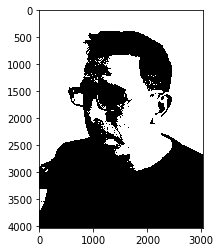

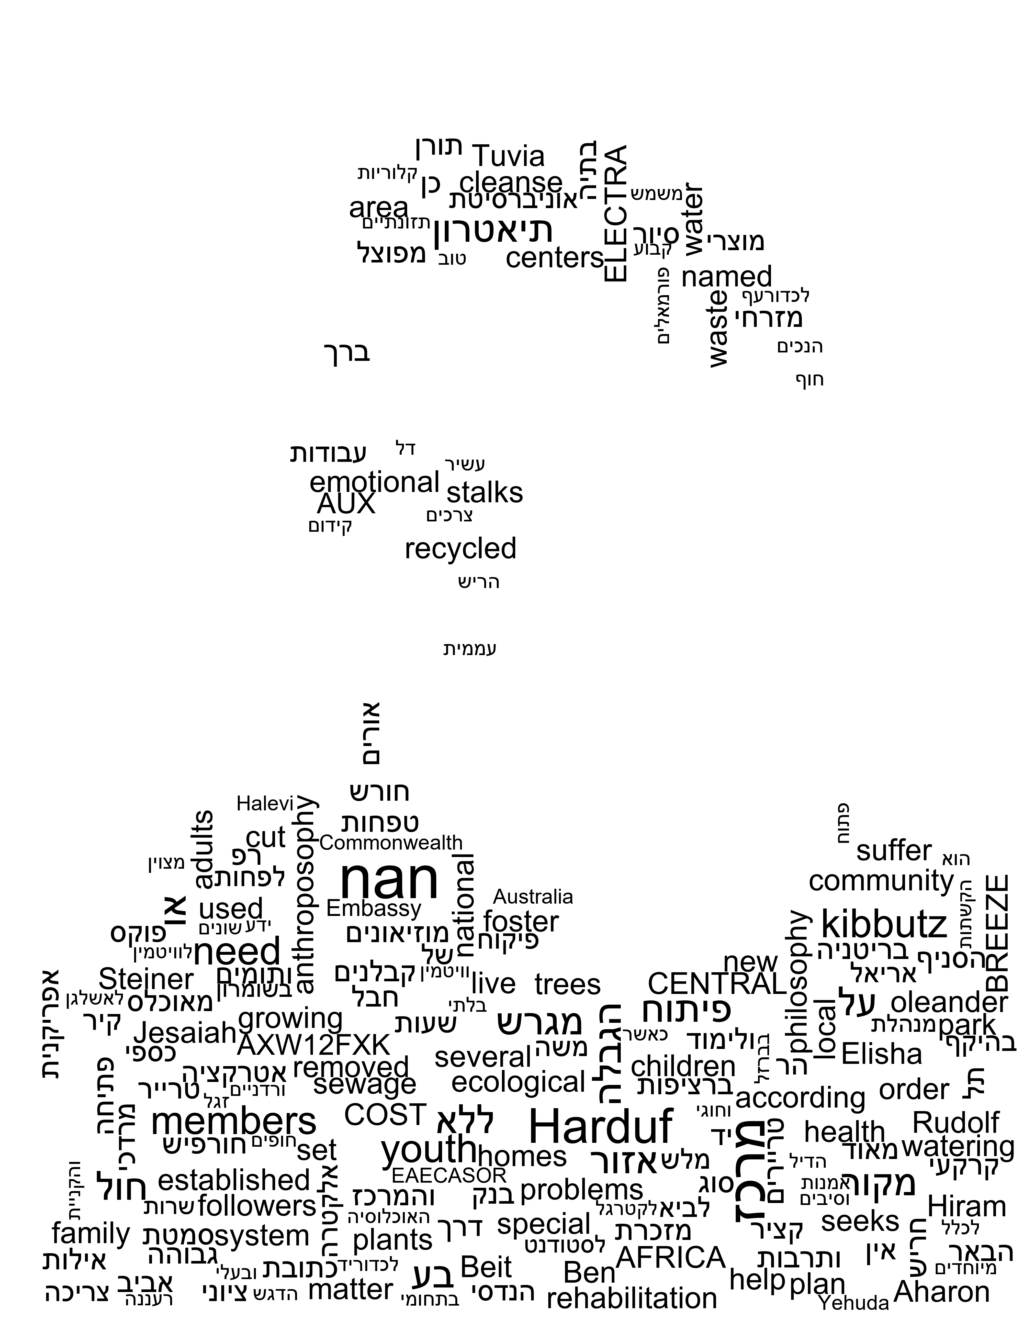

In [99]:
mask_path = "../data/inputs/images/dark_dori_rgb.jpg"
out_path = "../data/outputs/wordcloud_mask_black_morning.jpg"
get_cloud_mask(mask_path,"",out_path)